## Import the Necessary libraries

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings(action="ignore")

## Load the dataset

In [2]:
# Load the dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/Venkatalakshmikottapalli/Heart-Disease-Prediction/refs/heads/main/data/raw/heart_disease_health_indicators.csv')

# Print the head of the dataset
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
253657,0,0,1,1,24,0,0,0,0,0,...,1,0,3,0,0,0,0,7,5,3
253658,0,0,0,0,27,0,0,0,1,0,...,1,1,2,0,0,0,0,3,6,5
253659,0,0,1,1,37,0,0,2,0,0,...,1,0,4,0,0,0,0,6,4,1


## Data Summary

HeartDiseaseorAttack: A binary indicator where 1 means the individual has a history of heart disease or heart attack, and 0 means they do not.

HighBP: A binary indicator where 1 means the individual has been diagnosed with high blood pressure, and 0 means they have not.

HighChol: A binary indicator where 1 means the individual has been diagnosed with high blood cholesterol, and 0 means they have not.

CholCheck: A binary indicator where 1 means the individual has had their cholesterol checked within the last five years, and 0 means they have not.

BMI: Body Mass Index, a numerical value calculated from the individual's weight and height. It’s used to classify underweight, normal weight, overweight, and obesity.

Smoker: A binary indicator where 1 means the individual has smoked at least 100 cigarettes in their lifetime, and 0 means they have not.

Stroke: A binary indicator where 1 means the individual has a history of stroke, and 0 means they do not.

Diabetes: A binary indicator where 1 means the individual has a history of diabetes (or is currently pre-diabetic), and 0 means they do not.

PhysActivity: A binary indicator where 1 means the individual engages in some form of physical activity, and 0 means they do not.

Fruits: A binary indicator where 1 means the individual consumes one or more fruits daily, and 0 means they do not.

Veggies: A binary indicator where 1 means the individual consumes one or more vegetables daily, and 0 means they do not.

HvyAlcoholConsump: A binary indicator where 1 means the individual consumes more than 14 alcoholic drinks per week, and 0 means they do not.

AnyHealthcare: A binary indicator where 1 means the individual has some form of health insurance, and 0 means they do not.

NoDocbcCost: A binary indicator where 1 means the individual needed to see a doctor within the past year but couldn’t due to cost, and 0 means they did not face this issue.

GenHlth: A categorical variable ranging from 1 to 5, where:

1 = Excellent health
2 = Very good health
3 = Good health
4 = Fair health
5 = Poor health
MentHlth: A numerical variable representing the number of days in the past 30 days when the individual experienced poor mental health.

PhysHlth: A numerical variable representing the number of days in the past 30 days when the individual experienced poor physical health.

DiffWalk: A binary indicator where 1 means the individual has difficulty walking or climbing stairs, and 0 means they do not.

Sex: A binary indicator where 0 represents females and 1 represents males.

Age: A categorical variable indicating age classes, with values from 1 to 13:

1 = 18-24 years
2 = 25-29 years
3 = 30-34 years
4 = 35-39 years
5 = 40-44 years
6 = 45-49 years
7 = 50-54 years
8 = 55-59 years
9 = 60-64 years
10 = 65-69 years
11 = 70-74 years
12 = 75-79 years
13 = 80+ years
Education: A categorical variable indicating the highest level of education completed, with values from 0 to 6:

0 = Never attended school/kindergarten only
1 = Grades 1-8 (elementary)
2 = Grades 9-11 (some high school)
3 = Grade 12 or GED (high school graduate)
4 = Some college (1-3 years)
5 = College graduate (4+ years)
Income: A categorical variable indicating the total household income, with values from 1 to 8:

1 = Less than $10,000
2 = $10,000 to $15,000
3 = $15,000 to $20,000
4 = $20,000 to $25,000
5 = $25,000 to $35,000
6 = $35,000 to $50,000
7 = $50,000 to $75,000
8 = $75,000+

## Data Preprocessing

### Information of dataset

In [124]:
# Get the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

## Summary statistics of dataset

In [125]:
# Get summary statistics
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,...,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000
mean,0.094173,0.428990,0.424113,0.962667,28.382475,0.443186,0.040570,0.296904,0.756577,0.634264,...,0.951049,0.084164,2.511379,3.184778,4.242028,0.168221,0.440348,8.032197,5.050461,6.054052
std,0.292070,0.494933,0.494209,0.189578,6.608638,0.496763,0.197292,0.698147,0.429149,0.481637,...,0.215766,0.277633,1.068472,7.412822,8.717905,0.374063,0.496430,3.054203,0.985718,2.071036
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Check for nulls

In [126]:
# Check for nulls
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Check for duplicates

In [127]:
# Check for duplicates
duplicates = df[df.duplicated()]
duplicates

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,0,1,1,1,27,1,0,2,0,0,...,1,0,5,0,30,1,0,10,4,5
1563,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
2700,0,0,0,1,32,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8
3160,0,0,0,1,21,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
3332,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,1,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,0,1,1,1,33,0,0,2,1,1,...,1,0,3,0,0,0,1,9,6,6
253550,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,7,6,8
253563,0,0,1,1,24,1,0,0,1,1,...,1,0,2,0,0,0,1,8,6,8
253597,0,0,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8


## Remove duplicates

In [128]:
# Remove duplicates
df = df.drop_duplicates()

In [129]:
# Check duplicates again
df[df.duplicated()]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


## Exploratory Data Analysis

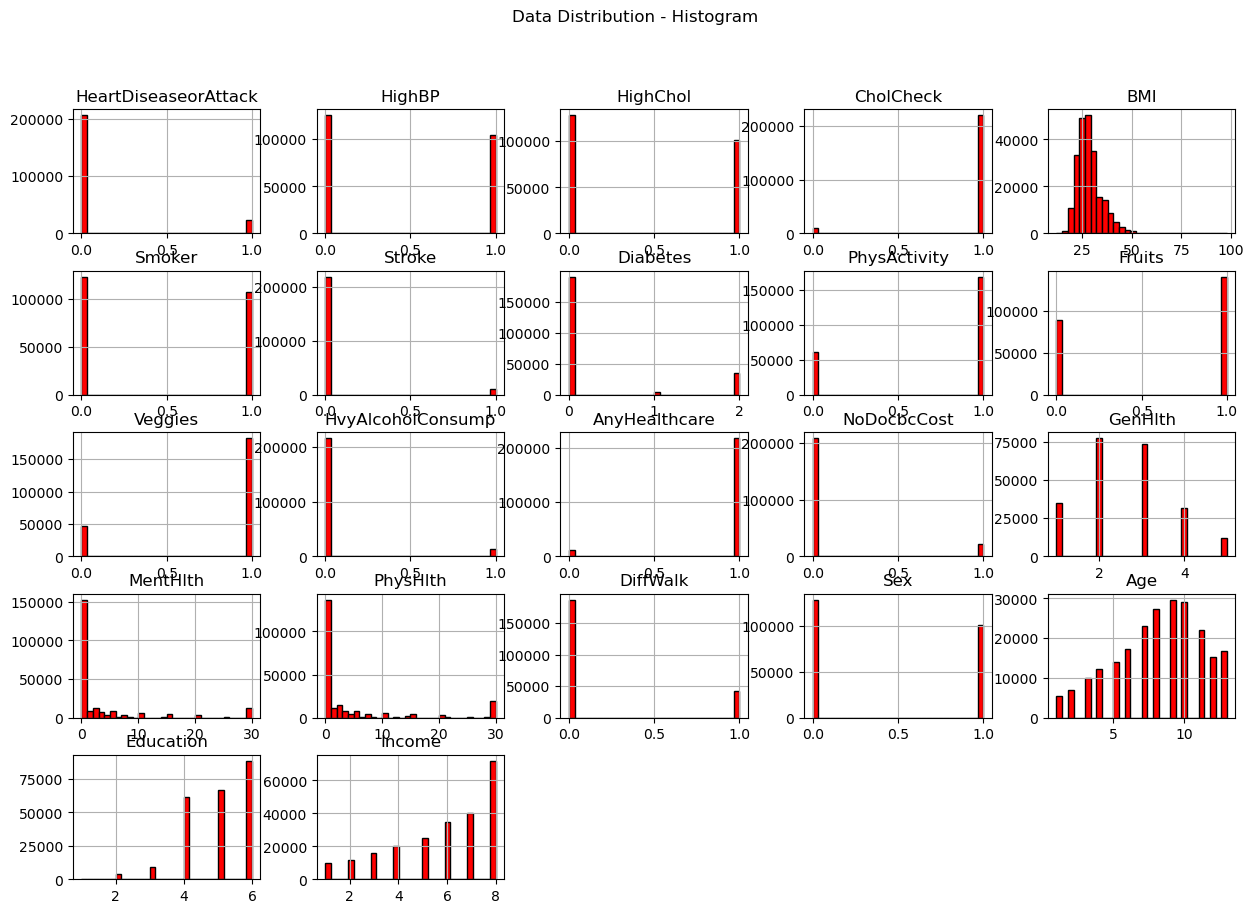

In [130]:
# Plot the histograms for dataset
df.hist(bins=30, figsize=(15, 10), color='red', edgecolor='black')
plt.suptitle('Data Distribution - Histogram')
plt.show()

In [131]:
# Get summary statistics for heartdisease or Attack
df['HeartDiseaseorAttack'].describe()

count    229762.000000
mean          0.103202
std           0.304224
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: HeartDiseaseorAttack, dtype: float64

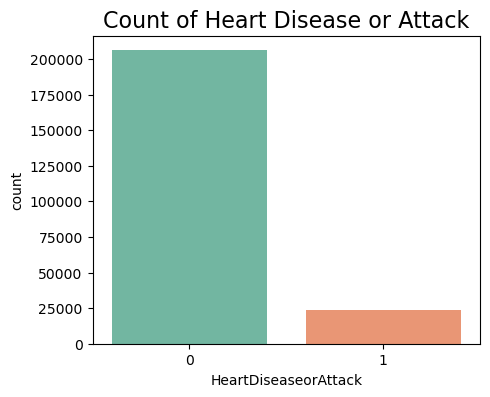

In [132]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HeartDiseaseorAttack', data=df, hue='HeartDiseaseorAttack', palette='Set2', legend=False)
plt.title('Count of Heart Disease or Attack', fontsize=16)
plt.show()

## Feature Engineering

## Get Feature Importance

In [133]:
# 1. Select the features 
X = df.drop(columns=['HeartDiseaseorAttack'])
y = df['HeartDiseaseorAttack']  

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 5. Get feature importances
feature_importances = rf.feature_importances_

# 6. Create a DataFrame to view feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 7. Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 8. Print the most important features
print("Feature importances:")
importance_df

Feature importances:


,Feature,Importance
3,BMI,0.192523
18,Age,0.111162
20,Income,0.104042
15,PhysHlth,0.086274
19,Education,0.074557
13,GenHlth,0.066740
14,MentHlth,0.064794
8,Fruits,0.033180
7,PhysActivity,0.028798
6,Diabetes,0.028021


## Remove Less important features

In [134]:
df = df.drop(columns = ['NoDocbcCost', 'HvyAlcoholConsump', 'AnyHealthcare', 'CholCheck'])

## Scale the data

In [135]:
# Define numerical, ordinal, and categorical columns
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
ordinal_features = ['GenHlth', 'Education', 'Income', 'Age']  
categorical_features = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Smoker',
                        'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'DiffWalk', 'Sex',]  

# Ensure ordinal features are treated as integers
df[ordinal_features] = df[ordinal_features].astype(int)

# Pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for ordinal features
ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

# Pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('ord', ordinal_pipeline, ordinal_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(df)

# Get feature names
numerical_names = numerical_features
ordinal_names = ordinal_features
categorical_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

feature_names = numerical_names + ordinal_names + categorical_names

# Convert to DataFrame 
df = pd.DataFrame(X, columns=feature_names)

# Display transformed features
df.head()

,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age,HeartDiseaseorAttack_1,HighBP_1,HighChol_1,Smoker_1,Stroke_1,Diabetes_1,Diabetes_2,PhysActivity_1,Fruits_1,Veggies_1,DiffWalk_1,Sex_1
0,1.667211,1.879070,1.141305,4.0,3.0,2.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.543127,-0.454439,-0.516790,2.0,5.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.101059,3.434743,2.799400,4.0,3.0,7.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.248415,-0.454439,-0.516790,1.0,2.0,5.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,-0.690483,-0.065520,-0.516790,1.0,4.0,3.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


## Over Sampling

In [136]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['HeartDiseaseorAttack_1'])
y = df['HeartDiseaseorAttack_1']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to pandas DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_series = pd.Series(y_resampled, name=y.name)
resampled_df = pd.concat([X_resampled_df, y_resampled_series], axis=1)

## New Data info

In [137]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412100 entries, 0 to 412099
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BMI                     412100 non-null  float64
 1   MentHlth                412100 non-null  float64
 2   PhysHlth                412100 non-null  float64
 3   GenHlth                 412100 non-null  float64
 4   Education               412100 non-null  float64
 5   Income                  412100 non-null  float64
 6   Age                     412100 non-null  float64
 7   HighBP_1                412100 non-null  float64
 8   HighChol_1              412100 non-null  float64
 9   Smoker_1                412100 non-null  float64
 10  Stroke_1                412100 non-null  float64
 11  Diabetes_1              412100 non-null  float64
 12  Diabetes_2              412100 non-null  float64
 13  PhysActivity_1          412100 non-null  float64
 14  Fruits_1            

## Check for duplicates after over sampling

In [138]:
# Check for duplictes
duplicates_rdf = resampled_df[resampled_df.duplicated()]
duplicates_rdf

,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age,HighBP_1,HighChol_1,Smoker_1,Stroke_1,Diabetes_1,Diabetes_2,PhysActivity_1,Fruits_1,Veggies_1,DiffWalk_1,Sex_1,HeartDiseaseorAttack_1
1234,-1.279906,-0.454439,-0.51679,0.0,5.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2406,-0.248415,-0.454439,-0.51679,2.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
3457,1.519855,-0.454439,-0.51679,1.0,5.0,7.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4360,-0.248415,-0.454439,-0.51679,0.0,5.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4539,-0.395771,-0.454439,-0.51679,1.0,5.0,7.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392677,-0.543127,-0.454439,-0.51679,1.0,5.0,7.0,10.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
395255,-0.690483,-0.454439,-0.51679,1.0,5.0,7.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
395955,-0.985194,-0.454439,-0.51679,1.0,5.0,7.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
398494,-0.690483,-0.454439,-0.51679,1.0,5.0,7.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [139]:
# Drop the duplicates
resampled_df = resampled_df.drop_duplicates()

## Check the Imbalancing after sampling

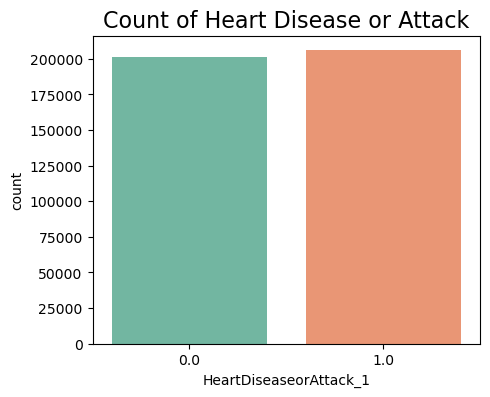

In [140]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HeartDiseaseorAttack_1', data=resampled_df, hue='HeartDiseaseorAttack_1', palette='Set2', legend=False)
plt.title('Count of Heart Disease or Attack', fontsize=16)
plt.show()

In [141]:
resampled_df.head()

,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age,HighBP_1,HighChol_1,Smoker_1,Stroke_1,Diabetes_1,Diabetes_2,PhysActivity_1,Fruits_1,Veggies_1,DiffWalk_1,Sex_1,HeartDiseaseorAttack_1
0,1.667211,1.879070,1.141305,4.0,3.0,2.0,8.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.543127,-0.454439,-0.516790,2.0,5.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.101059,3.434743,2.799400,4.0,3.0,7.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.248415,-0.454439,-0.516790,1.0,2.0,5.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,-0.690483,-0.065520,-0.516790,1.0,4.0,3.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [142]:
# Define a dictionary with the current column names and their new names
column_rename_dict = {
    'Diabetes_1': 'PreDiabetes', 
    'Diabetes_2': 'Diabetes',     
    'HighBP_1': 'HighBloodPressure',  
    'HighChol_1': 'HighCholesterol',  
    'Smoker_1': 'Smoker',          
    'Stroke_1': 'StrokeHistory',   
    'PhysActivity_1': 'PhysicalActivity',  
    'Fruits_1': 'FruitConsumption',  
    'Veggies_1': 'VeggieConsumption',  
    'DiffWalk_1': 'DifficultyWalking',  
    'Sex_1': 'Gender',             
    'HeartDiseaseorAttack_1': 'HeartDisease'  
}

# Rename the columns in the DataFrame
resampled_df.rename(columns=column_rename_dict, inplace=True)

# Display the updated column names
resampled_df.head()

,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age,HighBloodPressure,HighCholesterol,Smoker,StrokeHistory,PreDiabetes,Diabetes,PhysicalActivity,FruitConsumption,VeggieConsumption,DifficultyWalking,Gender,HeartDisease
0,1.667211,1.879070,1.141305,4.0,3.0,2.0,8.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.543127,-0.454439,-0.516790,2.0,5.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.101059,3.434743,2.799400,4.0,3.0,7.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.248415,-0.454439,-0.516790,1.0,2.0,5.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,-0.690483,-0.065520,-0.516790,1.0,4.0,3.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


## Save the preprocessed data

In [143]:
import os
# Create the data/processed directory if not exists
os.makedirs('../data/processed', exist_ok=True)

# Saving the Dataframe as a csv
resampled_df.to_csv('../data/processed/Heart_disease_symptoms.csv', index=False) 